In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/forest-fires-in-brazil/amazon.csv


In [2]:
data = pd.read_csv("../input/forest-fires-in-brazil/amazon.csv", encoding = "ISO-8859-1",index_col = ['date'],parse_dates = ['date'])

<h1>Display Top 5 Rows of The Dataset


In [3]:
data.head()

,year,state,month,number
date,,,,
1998-01-01,1998,Acre,Janeiro,0.0
1999-01-01,1999,Acre,Janeiro,0.0
2000-01-01,2000,Acre,Janeiro,0.0
2001-01-01,2001,Acre,Janeiro,0.0
2002-01-01,2002,Acre,Janeiro,0.0


<h1>Check Last 5 Rows


In [4]:
data.tail()

,year,state,month,number
date,,,,
2012-01-01,2012,Tocantins,Dezembro,128.0
2013-01-01,2013,Tocantins,Dezembro,85.0
2014-01-01,2014,Tocantins,Dezembro,223.0
2015-01-01,2015,Tocantins,Dezembro,373.0
2016-01-01,2016,Tocantins,Dezembro,119.0


<h1>Find Shape of Our Dataset (Number of Rows And Number of Columns)


In [5]:
data.shape

(6454, 4)

<h1>Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6454 entries, 1998-01-01 to 2016-01-01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 252.1+ KB


<h1>Check For Duplicate Data and Drop Them


In [7]:
if data.duplicated().any():
    data.drop_duplicates(inplace=True)
    print("Drop Duplicated Data Succ.")
else:
    print("No Duplicated Data")

Drop Duplicated Data Succ.


<h1>Check Null Values In The Dataset

In [8]:
data.isnull().sum()

year      0
state     0
month     0
number    0
dtype: int64

<Axes: ylabel='date'>

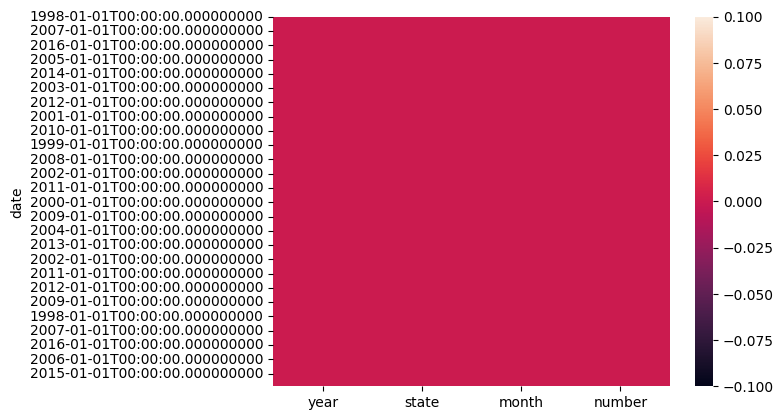

In [9]:
sns.heatmap(data.isnull())

<h1>Get Overall Statistics About The Dataframe


In [10]:
data.describe(include="all")

,year,state,month,number
count,6422.000000,6422,6422,6422.000000
unique,NaN,23,12,NaN
top,NaN,Rio,Agosto,NaN
freq,NaN,697,540,NaN
mean,2007.490969,NaN,NaN,108.815178
std,5.731806,NaN,NaN,191.142482
min,1998.000000,NaN,NaN,0.000000
25%,2003.000000,NaN,NaN,3.000000
50%,2007.000000,NaN,NaN,24.497000
75%,2012.000000,NaN,NaN,114.000000


<h1>Rename Month Names To English


In [11]:
data.columns

Index(['year', 'state', 'month', 'number'], dtype='object')

In [12]:
import calendar

data["month"] = data["month"].replace(to_replace=data.month.unique(), value=list(calendar.month_name)[1:])
data.month.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

<h1>Total Number of Fires Registered

In [13]:
data.shape[0]

6422

<h1>In Which Month Maximum Number of Forest Fires Were Reported?


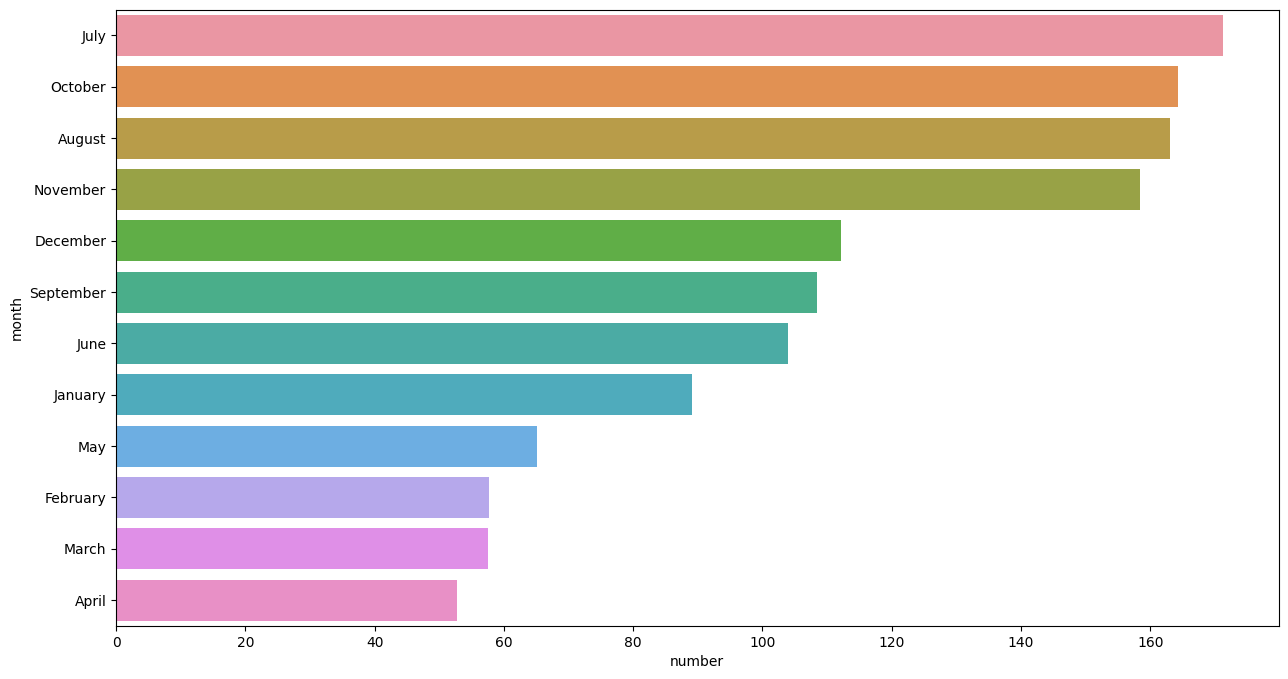

In [14]:
plt.figure(figsize=(15, 8))
top_month = data.groupby("month")["number"].mean().sort_values(ascending=False).to_frame()
sns.barplot(data=top_month, y=top_month.index, x="number");


<h1>In Which Year Maximum Number of Forest Fires Was Reported?


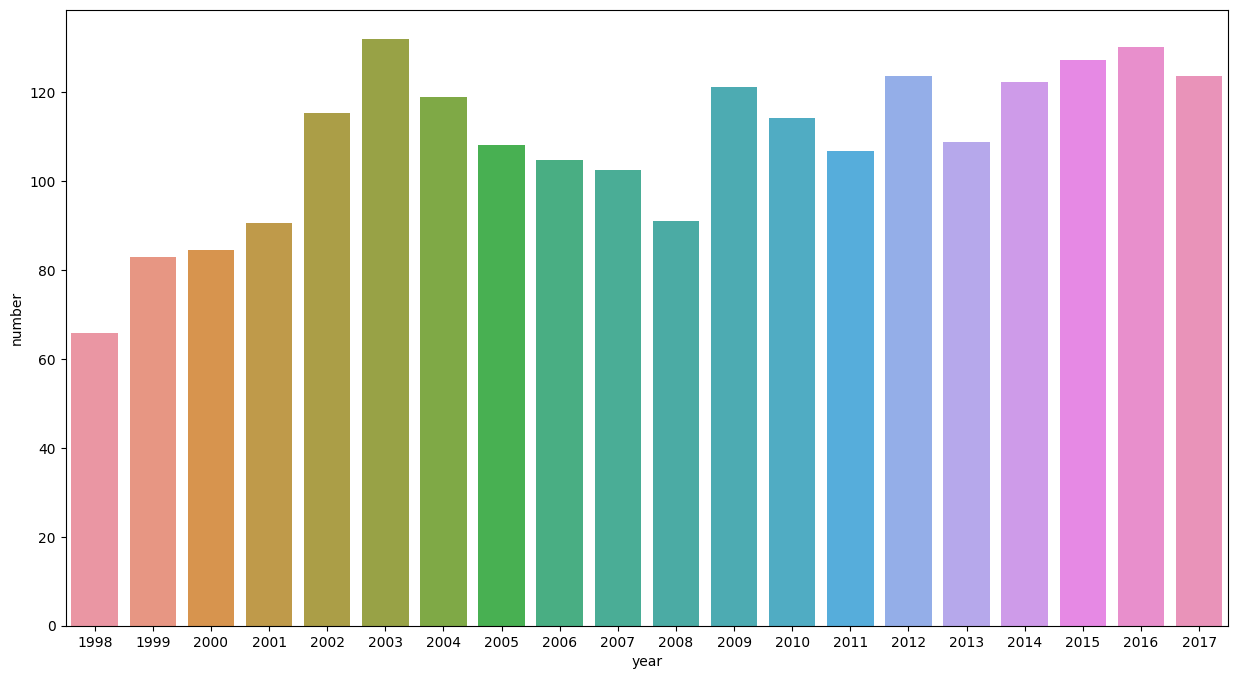

In [15]:
plt.figure(figsize=(15, 8))
top_year = data.groupby("year")["number"].mean().sort_values(ascending=False).to_frame()
sns.barplot(data=top_year, x=top_year.index, y="number");


<h1>In Which State Maximum Number of Forest Fires Was Reported?


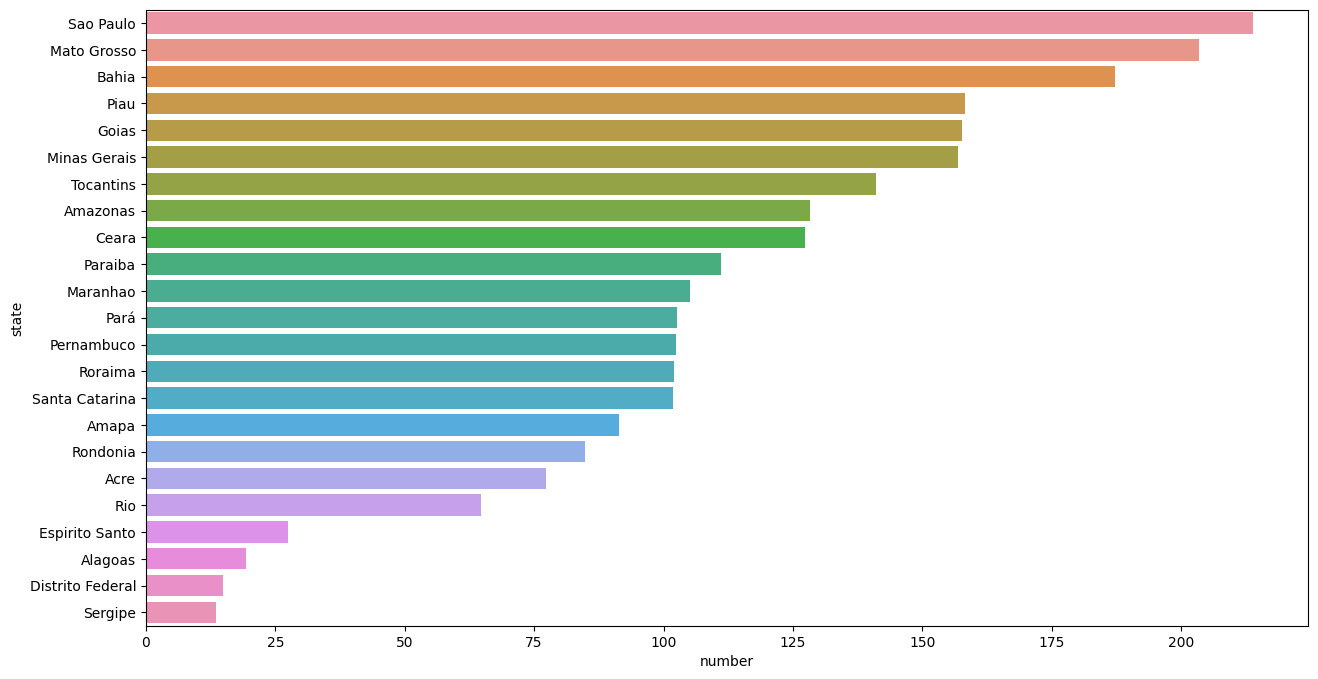

In [16]:
plt.figure(figsize=(15, 8))
top_state = data.groupby("state")["number"].mean().sort_values(ascending=False).to_frame()
sns.barplot(data=top_state, y=top_state.index, x="number");


<h1>Find Total Number of Fires Were Reported In Amazonas


In [17]:
data.head()

,year,state,month,number
date,,,,
1998-01-01,1998,Acre,January,0.0
1999-01-01,1999,Acre,January,0.0
2000-01-01,2000,Acre,January,0.0
2001-01-01,2001,Acre,January,0.0
2002-01-01,2002,Acre,January,0.0


In [18]:
data[data["state"] == "Amazonas"]["number"].sum()

30650.129

<h1>Display Number of Fires Were Reported In Amazonas (Year-Wise)


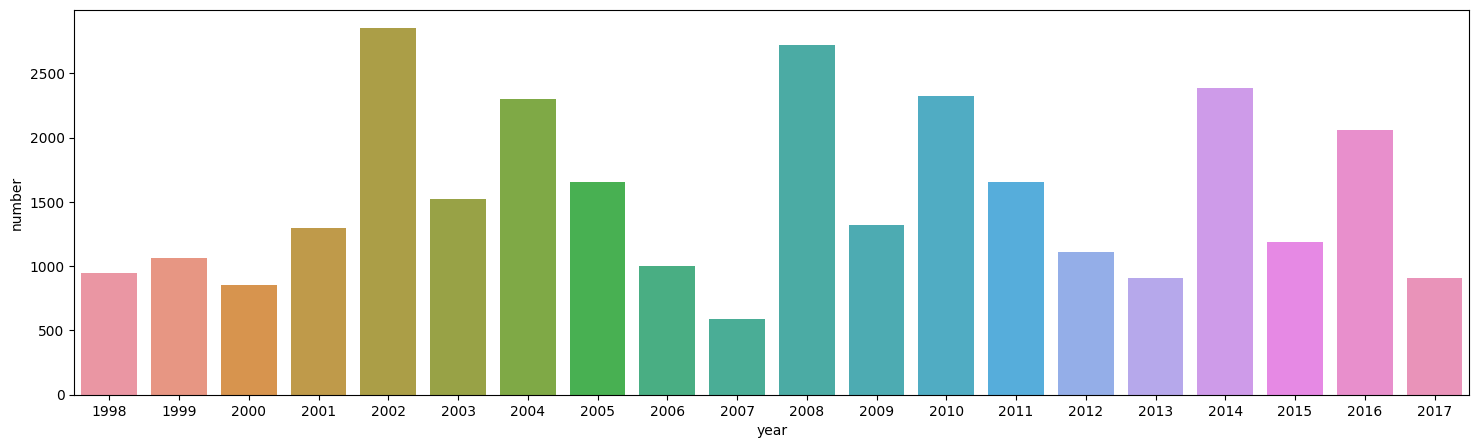

In [19]:
plt.figure(figsize=(18, 5))
f_amazon_year = data[data["state"] == "Amazonas"].groupby("year")["number"].sum().to_frame()
sns.barplot(data=f_amazon_year, x=f_amazon_year.index, y="number");

<h1>Display Number of Fires Were Reported In Amazonas (Day-Wise)


In [20]:
data["day"] = data.index.dayofweek

In [21]:
data.head()

,year,state,month,number,day
date,,,,,
1998-01-01,1998,Acre,January,0.0,3
1999-01-01,1999,Acre,January,0.0,4
2000-01-01,2000,Acre,January,0.0,5
2001-01-01,2001,Acre,January,0.0,0
2002-01-01,2002,Acre,January,0.0,1


In [22]:
list(calendar.day_name)

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [23]:
data["day"] = data["day"].replace(to_replace=sorted(data.day.unique()), value=list(calendar.day_name))
data.head()

,year,state,month,number,day
date,,,,,
1998-01-01,1998,Acre,January,0.0,Thursday
1999-01-01,1999,Acre,January,0.0,Friday
2000-01-01,2000,Acre,January,0.0,Saturday
2001-01-01,2001,Acre,January,0.0,Monday
2002-01-01,2002,Acre,January,0.0,Tuesday


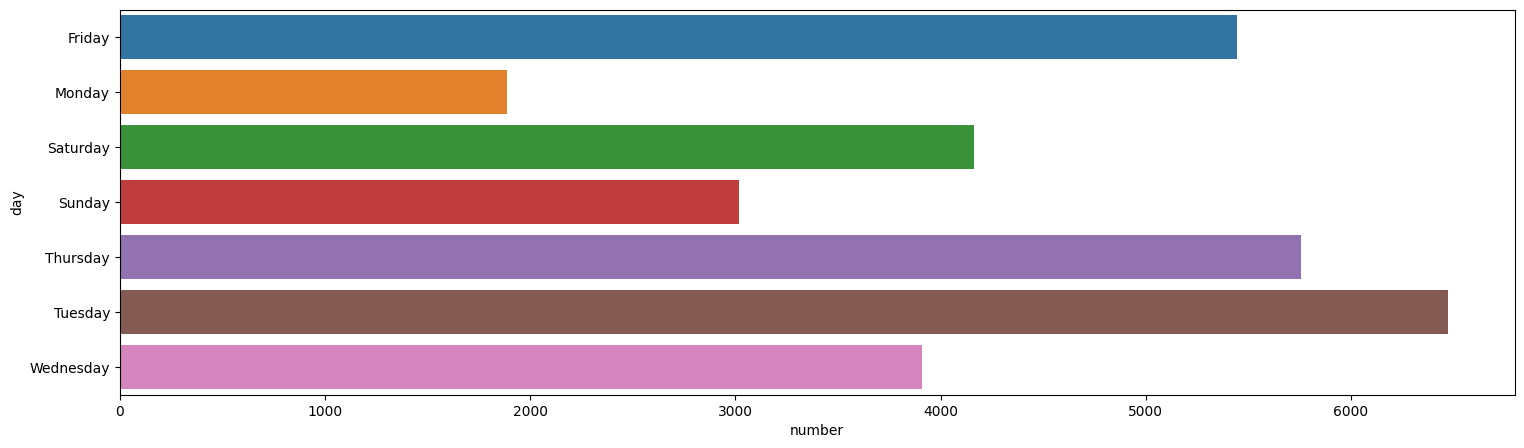

In [24]:
plt.figure(figsize=(18, 5))
f_amazon_day = data[data["state"] == "Amazonas"].groupby("day")["number"].sum().to_frame()
sns.barplot(data=f_amazon_day, y=f_amazon_day.index, x="number");

<h1>Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’


In [25]:
data2015 = data[data["year"] == 2015]

<Axes: xlabel='month', ylabel='number'>

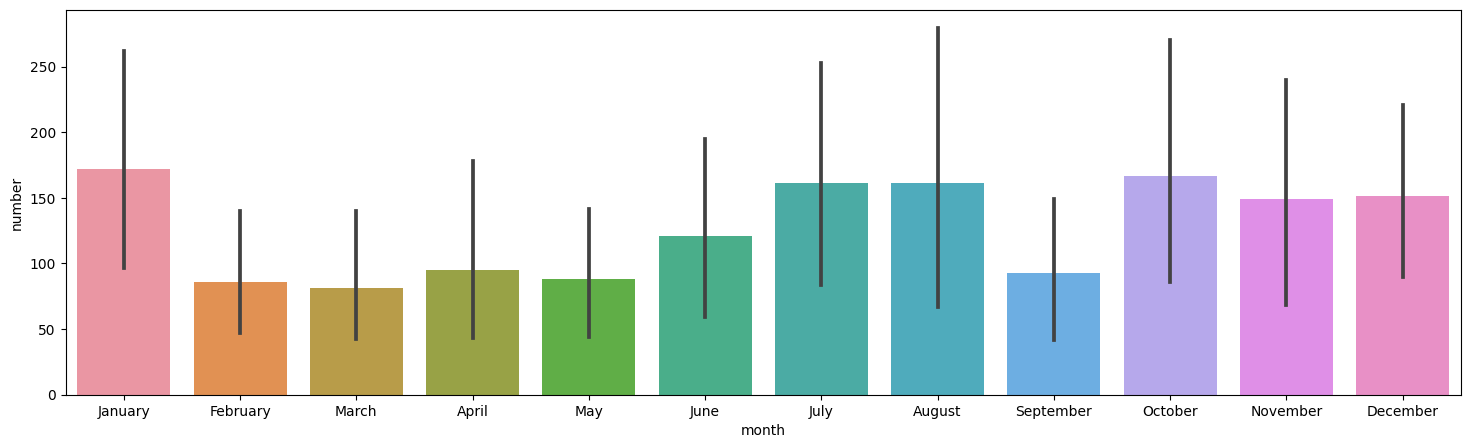

In [26]:
plt.figure(figsize=(18, 5))
sns.barplot(data=data2015, x="month", y="number")

<h1>Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)


In [27]:
sat_wise = data.groupby(by="state")["number"].mean().sort_values(ascending=False).to_frame()
sat_wise

,number
state,
Sao Paulo,213.896226
Mato Grosso,203.479975
Bahia,187.222703
Piau,158.174674
Goias,157.721841
Minas Gerais,156.800243
Tocantins,141.037176
Amazonas,128.243218
Ceara,127.314071


<Axes: xlabel='number', ylabel='state'>

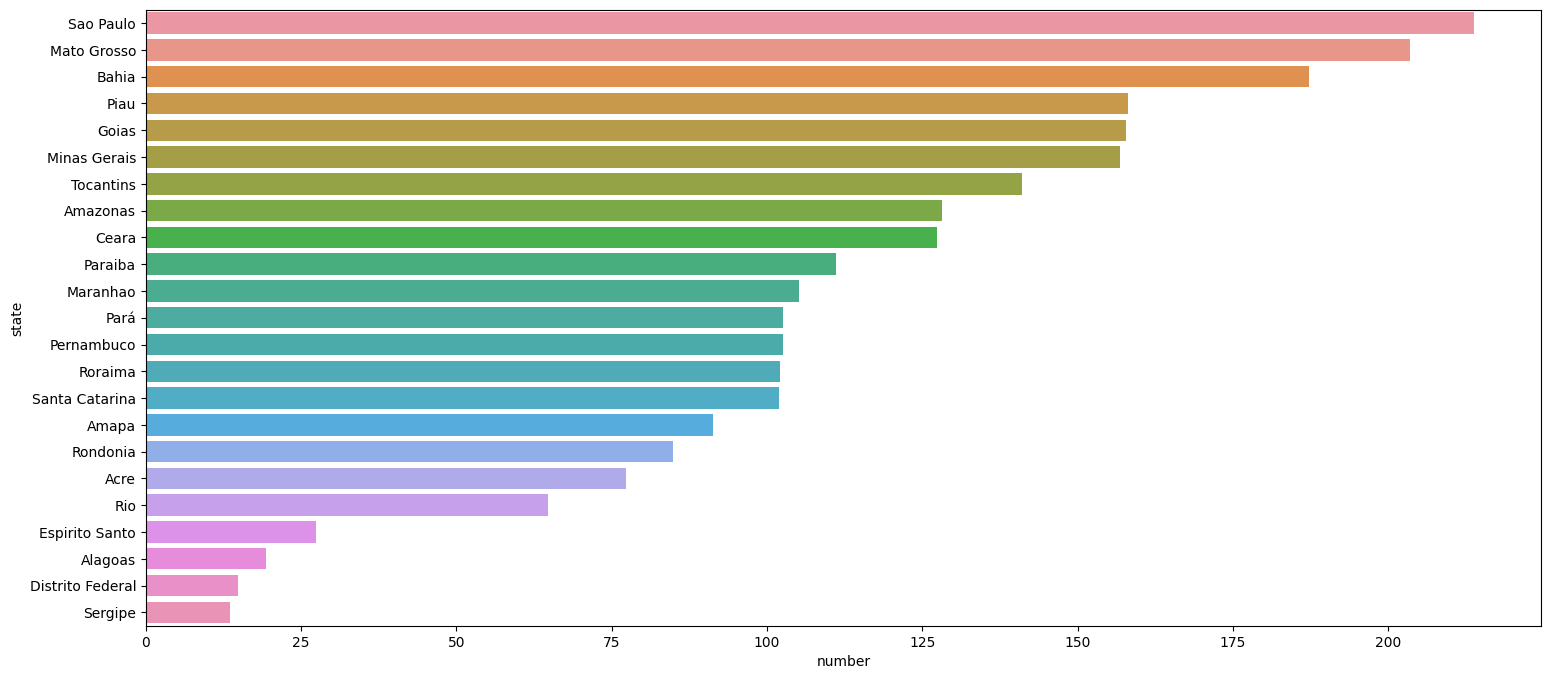

In [28]:
plt.figure(figsize=(18, 8))
sns.barplot(data=sat_wise, y=sat_wise.index, x="number")

<h1>To Find The State Names Where Fires Were Reported In 'dec' Month

In [29]:
b = data[data["month"] == "December"]["state"].unique()
b

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)